In [186]:
# Importation des bibliothéques utiles pour l'analyse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [187]:
# Chargement de notre DataFrame 
data=pd.read_csv("C:/Users/User/Desktop/Projet_ML/Telco-Customer-Churn1.csv")
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [188]:
var_to_drop=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
             'Churn Label', 'CLTV','Churn Score', 'Churn Reason']

In [189]:
#suppression des variables unutiles
data=data.drop(columns=var_to_drop)

In [190]:
# Convertion en type numérique
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')


In [191]:
# on va supprimer les 11 valeur manquantes de la variable 'Total Charges
data=data.dropna()

In [192]:
data.shape

(7032, 20)

In [193]:
#liste des variables a encoder 
col_to_encoder=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']

In [194]:
data_encod=pd.get_dummies(data[col_to_encoder],drop_first=True)
data_num=data[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
data=pd.concat([data_encod,data_num],axis=1)
data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1
2,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
3,0,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
4,1,0,0,1,1,0,1,1,0,0,...,0,0,1,0,0,0,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,72,21.15,1419.40,0
7039,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,24,84.80,1990.50,0
7040,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,72,103.20,7362.90,0
7041,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,11,29.60,346.45,0


In [195]:
y=data['Churn Value']
y
x=data.drop(columns='Churn Value')
print(x.shape)
print(y.shape)

(7032, 30)
(7032,)


In [196]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = y)


In [197]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


x_train[['Tenure Months','Monthly Charges','Total Charges']]=scaler.fit_transform(x_train[['Tenure Months','Monthly Charges','Total Charges']])
x_test[['Tenure Months','Monthly Charges','Total Charges']]=scaler.transform(x_test[['Tenure Months','Monthly Charges','Total Charges']])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Selection Features with `SelectKBest`

In [198]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      

kbest = SelectKBest(score_func=f_classif, k=8)
kbest.fit(x_train, y_train)

print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(x.columns[kbest.get_support()]))
print("Variables supprimées :", list(x.columns[~kbest.get_support()]))

Sélection de variables : [False False False  True False False False  True False False False False
 False False False  True False  True False  True False False  True False
 False  True False  True False False]
Scores de variables : [2.66960088e+00 1.22935706e+02 1.25042115e+02 2.99753542e+02
 1.32157506e-02 1.32157506e-02 6.00299476e+00 4.94548050e+02
 2.57479773e+02 2.57479773e+02 1.56165165e+02 2.57479773e+02
 3.91767717e+01 2.57479773e+02 2.78144802e+01 2.57479773e+02
 1.57839432e+02 2.57479773e+02 2.04376969e+01 2.57479773e+02
 2.01203174e+01 1.99028493e+02 4.57783622e+02 1.84478517e+02
 8.20359990e+01 4.86746036e+02 4.31404190e+01 7.10686741e+02
 1.75936558e+02 2.12660324e+02]
Variables sélectionnées: ['Dependents_Yes', 'Internet Service_Fiber optic', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months']
Variables supprimées : ['Gender_Male', 'Senior Ci

In [199]:
x_train = kbest.transform(x_train)
x_test = kbest.transform(x_test)

In [200]:
x_train.shape

(4922, 8)

## Application du modele KNeighborsClassifier

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors' : np.arange(1,51),
           'metric': ['euclidean' ,'manhattan','minkowski'],
           'weights' :[ 'uniform','distance']} #dictionaire qui contient les paramtres qu'on veut regler
KNeighborsClassifier()
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']})

In [202]:
knn_grid.best_params_


{'metric': 'euclidean', 'n_neighbors': 47, 'weights': 'uniform'}

In [203]:

knn_model=KNeighborsClassifier(n_neighbors=47,metric='euclidean')

knn_model.fit(x_train,y_train)

print('score du train ' ,knn_model.score(x_train,y_train))
print('score du test' ,knn_model.score(x_test,y_test))

score du train  0.8035351483136937
score du test 0.8014218009478673


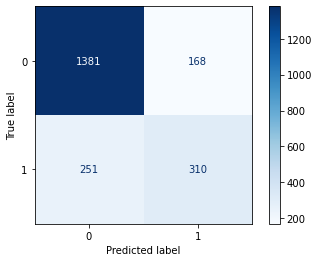

In [204]:
from sklearn.metrics import plot_confusion_matrix

y_pred=knn_model.predict(x_test)
plot_confusion_matrix(knn_model,x_test,y_test,cmap=plt.cm.Blues);

In [205]:
from sklearn.metrics import classification_report

y_pred=knn_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.846201  0.891543  0.868280      1549
           1   0.648536  0.552585  0.596728       561

    accuracy                       0.801422      2110
   macro avg   0.747368  0.722064  0.732504      2110
weighted avg   0.793646  0.801422  0.796081      2110



In [206]:
from sklearn.metrics import roc_curve
y_scores = knn_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

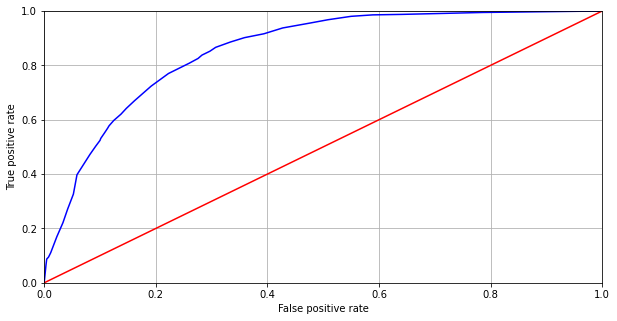

In [207]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [208]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8545395856564352

## Application du modele DecisionTreeClassifier

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10)
      } 

tree_grid= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [210]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [211]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)
tree_model.fit(x_train,y_train)
print('train score : ', tree_model.score(x_train,y_train))
print('test score : ', tree_model.score(x_test,y_test))

train score :  0.8071921982933766
test score :  0.7962085308056872


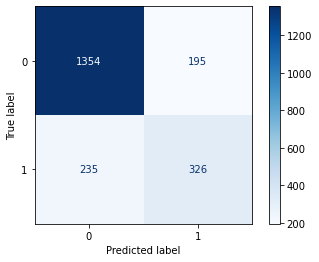

In [212]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Blues);

In [213]:
from sklearn.metrics import classification_report

y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.852108  0.874112  0.862970      1549
           1   0.625720  0.581105  0.602588       561

    accuracy                       0.796209      2110
   macro avg   0.738914  0.727609  0.732779      2110
weighted avg   0.791917  0.796209  0.793740      2110



In [214]:
from sklearn.metrics import roc_curve
y_scores = tree_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

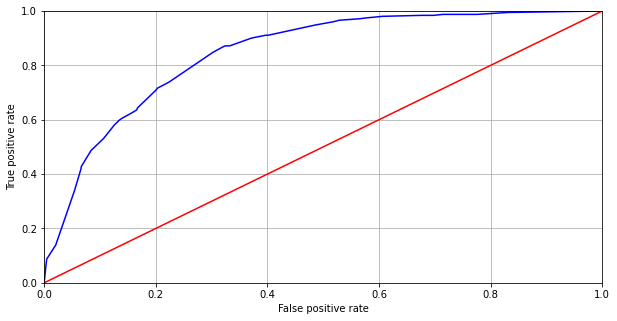

In [215]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [216]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8448236974230973

In [221]:
names=['Dependents_Yes', 'Internet Service_Fiber optic', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months']

In [222]:
for var, importance in zip(names, tree_model.feature_importances_):
    if importance != 0:
        print(var, importance)

Dependents_Yes 0.0938755409405296
Internet Service_Fiber optic 0.31010372205172293
Tech Support_No internet service 0.0161015208353007
Streaming TV_No internet service 0.03128665907971319
Contract_Two year 0.01522699930460866
Payment Method_Electronic check 0.0346194245995699
Tenure Months 0.498786133188555


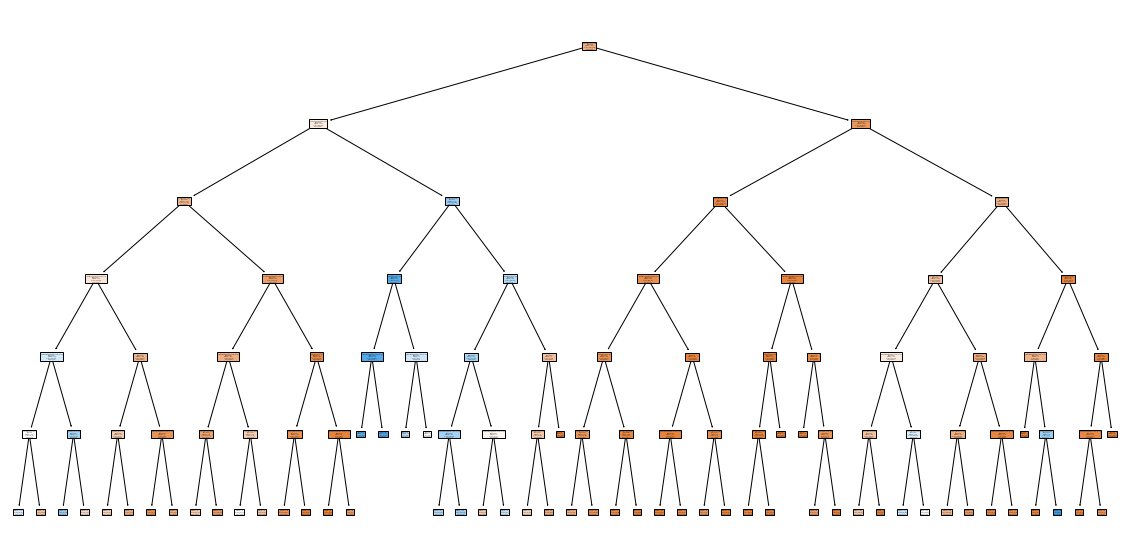

In [223]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
c=['quitter', 'rester']
plot_tree(tree_model, feature_names= names, class_names=c, filled=True)
plt.show()

In [224]:
from sklearn.tree import export_text

print(export_text(tree_model,feature_names=names))

|--- Tenure Months <= 0.22
|   |--- Internet Service_Fiber optic <= 0.50
|   |   |--- Tenure Months <= 0.04
|   |   |   |--- Streaming TV_No internet service <= 0.50
|   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |--- Tenure Months <= 0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Tenure Months >  0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |--- Dependents_Yes <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Dependents_Yes >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Streaming TV_No internet service >  0.50
|   |   |   |   |--- Tenure Months <= 0.01
|   |   |   |   |   |--- Dependents_Yes <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Dependents_Yes >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Tenure Months >  0.01
|   |   |   |   |   |--- Payment Method_Electronic che

## Application du modele NaiveBayes

In [225]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():   #nb.items; parcourir cle et valeur
    s = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6671984235070777,
 'bernoulli': 0.7348570013618917,
 'multinomial': 0.7777283232223186}

In [226]:
bayes_model = MultinomialNB()
bayes_model.fit(x_train, y_train)
print('train score : ' ,bayes_model.score(x_train,y_train))
print('test score : ' , bayes_model.score(x_test,y_test))

train score :  0.778138967899228
test score :  0.7758293838862559


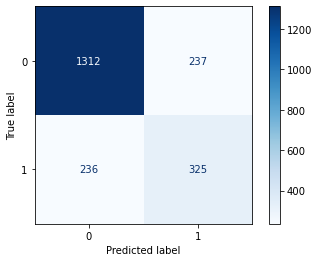

In [227]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(bayes_model,x_test,y_test,cmap=plt.cm.Blues);

In [228]:
from sklearn.metrics import classification_report

y_predi=bayes_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.84755   0.84700   0.84727      1549
           1    0.57829   0.57932   0.57881       561

    accuracy                        0.77583      2110
   macro avg    0.71292   0.71316   0.71304      2110
weighted avg    0.77596   0.77583   0.77589      2110



In [229]:
from sklearn.metrics import roc_curve
y_scores = bayes_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

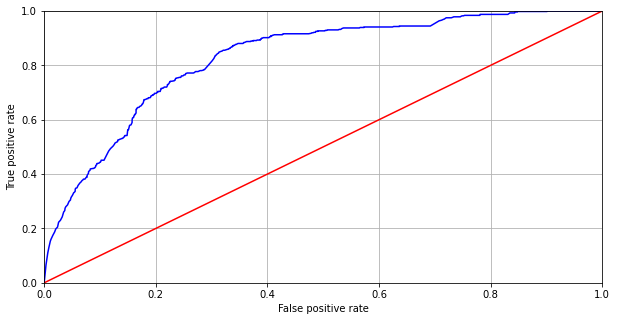

In [230]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [231]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.827287802262169

## Aplication du modele LogisticRegression

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs',

In [233]:
grid.best_params_

{'C': 0.10101010101010101, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [236]:
logre_model = LogisticRegression(random_state=0, C=0.10101, penalty = 'l1', solver='saga')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.8015034538805363
test score :  0.8052132701421801


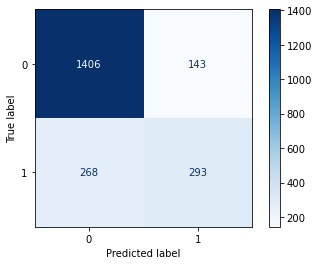

In [237]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [238]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.83990   0.90768   0.87248      1549
           1    0.67202   0.52228   0.58776       561

    accuracy                        0.80521      2110
   macro avg    0.75596   0.71498   0.73012      2110
weighted avg    0.79527   0.80521   0.79678      2110



In [239]:
from sklearn.metrics import roc_curve
y_scores = logre_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

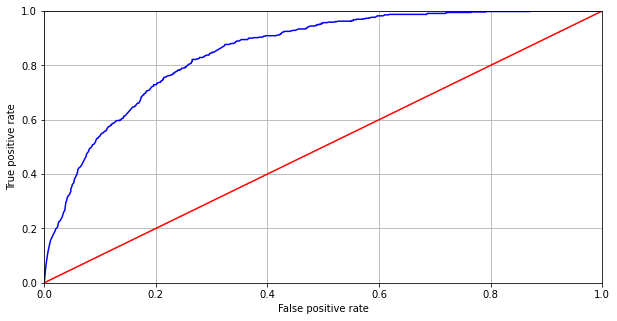

In [240]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [241]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8524975575064817

## Aplication du modele RandomForestClassifier

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10),
      } 

random_grid= GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
random_grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [254]:
random_grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [260]:
random_model=RandomForestClassifier(criterion='gini', max_depth=5,random_state=32)
random_model.fit(x_train,y_train)

print('train score : ' ,random_model.score(x_train,y_train))
print('test score : ' ,random_model.score(x_test,y_test))


train score :  0.8029256399837464
test score :  0.8023696682464455


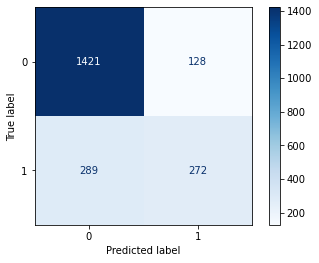

In [261]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,x_test,y_test,cmap=plt.cm.Blues);

In [108]:
y_predi=random_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.82984   0.91930   0.87228      1549
           1    0.68274   0.47950   0.56335       561

    accuracy                        0.80237      2110
   macro avg    0.75629   0.69940   0.71782      2110
weighted avg    0.79073   0.80237   0.79014      2110



In [109]:
from sklearn.metrics import roc_curve
y_scores = random_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

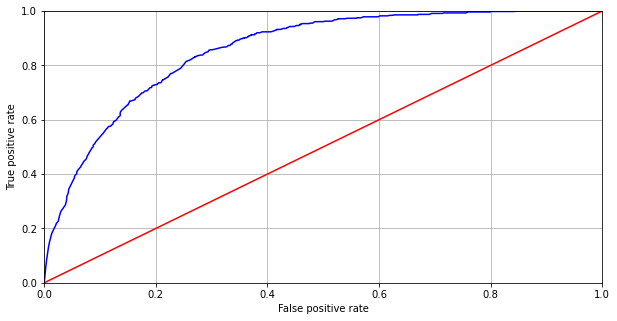

In [110]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [111]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8574510149150334

## Summary table 
## Selection Feature :`SelectKBest` ( with 8 features )

In [264]:
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

l=['KNeighborsClassifier','DecisionTreeClassifier','NaiveBayes(MultiNomial)','LogisticRegression','RandomForestClassifier']
train_score = pd.Series([0.8035,0.8071,0.7781,0.8015,0.8029], index=l)
test_score = pd.Series([0.8014,0.7962,0.7758,0.8052,0.8023], index=l)
f1_score_rester = pd.Series([0.8682,0.8629,0.8472,0.8724,0.8722], index=l)

f1_score_quitter = pd.Series([0.5967,0.6025,0.5788,0.5877,0.5633], index=l)
accuary = pd.Series([0.8014,0.7962,0.7758,0.8052,0.8023], index=l)
auc = pd.Series([0.8545,0.8448,0.8272,0.8524,0.8574], index=l)



In [265]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_rester': f1_score_rester,
                    'f1_score_quitter': f1_score_quitter ,
                   'accuary': accuary,
                   'AUC': auc})
stat


,train_score,test_score,f1_score_rester,f1_score_quitter,accuary,AUC
KNeighborsClassifier,0.8035,0.8014,0.8682,0.5967,0.8014,0.8545
DecisionTreeClassifier,0.8071,0.7962,0.8629,0.6025,0.7962,0.8448
NaiveBayes(MultiNomial),0.7781,0.7758,0.8472,0.5788,0.7758,0.8272
LogisticRegression,0.8015,0.8052,0.8724,0.5877,0.8052,0.8524
RandomForestClassifier,0.8029,0.8023,0.8722,0.5633,0.8023,0.8574


## Selection Feature :`SelectKBest` ( with 8 features )